In [635]:
# Testing Pacman
import postprocess as pp
import plots as plots
import json
import pandas as pd

In [636]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes

from pathlib import Path 

[]

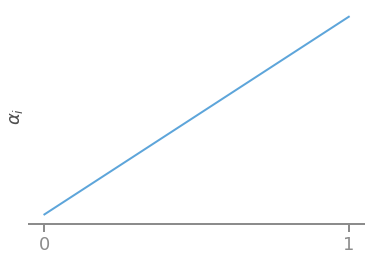

In [637]:
plt.rc('text', usetex=False)
plt.plot(np.linspace(0., 1), np.linspace(0., 1))
plt.ylabel(r'$\alpha_i$')

ax = plt.gca()

for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

ax.set_xticks([0, 1], ["0", "1"])
ax.set_yticks([])

In [638]:
import os
dirroot = '../../practice/output/parametric/traction-bar/vs_s/40e9b5126f5d6d2492c8c85885acca7b'


# Only hybrid
dirroot = '../../practice/output/parametric/traction-bar/vs_s/45531430636f54d1ccc4d5d651e7b2d5'


In [382]:
for subdir, dirs, files in os.walk(dirroot):
    if not os.path.isfile(subdir + "/signature.md5"):
        continue

    with open(subdir + '/timing_data.json', 'r') as f:
        _timings = json.load(f)

    with open(subdir + '/performance.json', 'r') as f:
        performance = json.load(f)

    params, data, signature = pp.load_data(subdir)
    timings = pd.DataFrame(json.loads(_timings), 
                               columns=["reps", "wall tot", "usr", "sys"], 
                               index=tasks)

    

In [639]:
with open('../../practice/output/parametric/traction-bar/vs_s/at1/5e75bdf88ee2b94491b44f64345ad5e2/' \
          '629ceadf46c0abb9937b29a72f6ba975/' \
          + 'timing_data.json', 'r') as f:
    _timings = json.load(f)



In [647]:
tasks = ["~First Order: AltMin solver",
    "~First Order: AltMin-Damage solver",
    "~First Order: AltMin-Elastic solver",
    "~First Order: Hybrid solver",
    "~Second Order: Bifurcation",
    "~Second Order: Cone Project",
    "~Second Order: Stability",
    "~Computation Experiment",
    "~Postprocessing and Vis"
    ]
timings = pd.DataFrame(json.loads(_timings), 
                            columns=["reps", "wall tot", "usr", "sys"], 
                            index=tasks)

In [648]:
timings

,reps,wall tot,usr,sys
~First Order: AltMin solver,1.0,0.263934,0.25,0.01
~First Order: AltMin-Damage solver,2.0,0.029676,0.03,0.00
~First Order: AltMin-Elastic solver,2.0,0.138330,0.13,0.01
~First Order: Hybrid solver,1.0,0.016646,0.02,0.00
~Second Order: Bifurcation,1.0,0.351141,0.35,0.00
~Second Order: Cone Project,2.0,0.000996,0.00,0.00
~Second Order: Stability,1.0,0.138425,0.13,0.01
~Computation Experiment,1.0,5.932567,6.55,0.19
~Postprocessing and Vis,NaN,NaN,NaN,NaN


In [696]:

tasks = ["~First Order: AltMin solver",
    "~First Order: AltMin-Damage solver",
    "~First Order: AltMin-Elastic solver",
    "~First Order: Hybrid solver",
    "~Second Order: Bifurcation",
    "~Second Order: Cone Project",
    "~Second Order: Stability",
    "~Computation Experiment",
    "~Postprocessing and Vis"
    ]

stab_tasks = [
        "~Second Order: Bifurcation",
    "~Second Order: Cone Project",
    "~Second Order: Stability",
    "~Computation Experiment",
    "~Postprocessing and Vis"
    ]
def get_timing_parametric(dirroot):
    # tasks = stab_tasks

    crunch = {
        "timings" : [],
        "tasks" : [],
        "parameter" : [],
        "n_proc" : [],
        "n_dofs" : [],
        "iterations" : [],
    }

    for subdir, dirs, files in os.walk(dirroot):
        if not os.path.isfile(subdir + "/signature.md5"):
            continue

        with open(subdir + '/timing_data.json', 'r') as f:
            _timings = json.load(f)

        with open(subdir + '/performance.json', 'r') as f:
            performance = json.load(f)

        params, data, signature = pp.load_data(subdir)
        timings = pd.DataFrame(json.loads(_timings), 
                                columns=["reps", "wall tot", "usr", "sys"], 
                                index=tasks)
        print(params["stability"]['cone']["scaling"])
        crunch["timings"].append(timings['wall tot'].values)
        crunch["parameter"].append(params["stability"]['cone']["scaling"])
        # crunch["parameter"].append(0)
        crunch["tasks"].append(tasks)
        crunch["n_proc"].append(int(performance['N'][0]))
        crunch["n_dofs"].append(int(performance['dofs'][0]))
        crunch["iterations"].append(data["cone_data"].tolist()[0]["iterations"])

    crunch = pd.DataFrame(crunch)
    crunch.sort_values('parameter', inplace = True)
    crunch.reset_index(inplace=True, drop=True)

    return crunch



def get_timing_parametric_vs_s(dirroot):

    crunch = {
        "computations" : [],
        "tasks" : [],
        "parameter" : [],
        "n_proc" : [],
        "n_dofs" : [],
        "iterations" : [],
    }

    for subdir, dirs, files in os.walk(dirroot):
        if not os.path.isfile(subdir + "/signature.md5"):
            continue

        with open(subdir + '/timing_data.json', 'r') as f:
            _timings = json.load(f)

        with open(subdir + '/performance.json', 'r') as f:
            performance = json.load(f)

        params, data, signature = pp.load_data(subdir)
        timings = pd.DataFrame(json.loads(_timings), 
                               columns=["reps", "wall tot", "usr", "sys"], 
                                index=tasks)

        crunch["computations"].append(timings['wall tot'].values)
        crunch["parameter"].append(params["stability"]['cone']["scaling"])
        crunch["tasks"].append(tasks)
        crunch["n_proc"].append(int(performance['N'][0]))
        crunch["n_dofs"].append(int(performance['dofs'][0]))
        crunch["iterations"].append([len(data["cone_data"][i]["iterations"]) for i in range(len(data["cone_data"]))])

    crunch = pd.DataFrame(crunch)
    crunch.sort_values('parameter', inplace = True)
    crunch.reset_index(inplace=True, drop=True)

    return crunch



In [400]:
crunch

,computations,tasks,parameter,n_proc,n_dofs,iterations
0,"[0.365849584, 0.044265458, 0.186652375, 0.0273...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-09,1,747,"[5, 5]"
1,"[0.374708834, 0.043890251, 0.192814625, 0.0272...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-08,1,747,"[5, 5]"
2,"[2.739975336, 0.575467667, 1.0341205, 0.199996...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-07,1,747,"[5, 5]"
3,"[5.363278669, 1.149469294, 1.89648325, 0.39255...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-06,1,747,"[5, 5]"
4,"[7.262490961, 1.585385248, 2.62045354, 0.53120...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-05,1,747,"[5, 5]"
5,"[9.550673128, 2.094007877, 3.424394208, 0.6930...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-04,1,747,"[5, 5]"
6,"[7.651347003, 1.634297423, 2.691432882, 0.5565...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-03,1,747,"[5, 5]"
7,"[9.964564754, 2.149128797, 3.492747758, 0.7276...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-02,1,747,"[101, 101]"
8,"[12.462790338, 2.707626381, 4.347640968, 0.906...","[~First Order: AltMin solver, ~First Order: Al...",1.000000e-01,1,747,"[33021, 33021]"


In [401]:
[its[0] for its in crunch["iterations"]]

[5, 5, 5, 5, 5, 5, 5, 101, 33021]

In [402]:
am_times = np.array([crunch["computations"][i][0] for i in range(len(crunch["computations"]))])
amd_times = np.array([crunch["computations"][i][1] for i in range(len(crunch["computations"]))])
ame_times = np.array([crunch["computations"][i][2] for i in range(len(crunch["computations"]))])
hyb_times = np.array([crunch["computations"][i][3] for i in range(len(crunch["computations"]))])


offset = 4

bif_times = np.array([crunch["computations"][i][offset + 0] for i in range(len(crunch["computations"]))])
proj_times = np.array([crunch["computations"][i][offset + 1] for i in range(len(crunch["computations"]))])
stab_times = np.array([crunch["computations"][i][offset + 2] for i in range(len(crunch["computations"]))])
tot_times = np.array([crunch["computations"][i][-1] for i in range(len(crunch["computations"]))])


Text(0, 0.5, '$t$ (s)')

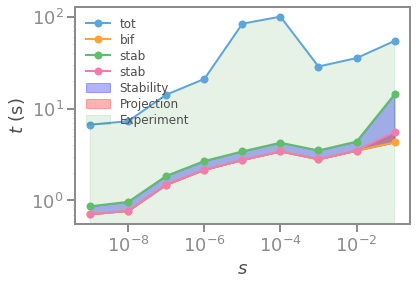

In [403]:
fig, ax = plt.subplots()
x = crunch["parameter"].values
ax.plot(x, tot_times,  label="tot", marker='o')
ax.plot(x, bif_times,  label="bif", marker='o')
ax.plot(x, bif_times + stab_times,  label="stab", marker='o')
ax.plot(x, bif_times + proj_times,  label="stab", marker='o')

plt.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
                 interpolate=True, color='blue', alpha=0.3, label='Stability')

plt.fill_between(x, bif_times, bif_times + proj_times, where=(bif_times + stab_times >= bif_times),
                 interpolate=True, color='red', alpha=0.3, label='Projection')

plt.fill_between(x, tot_times,  where=(tot_times >= 0),
                 interpolate=True, color='green', alpha=0.1, label='Experiment')


ax.loglog()
plt.legend()
plt.xlabel(r'$s$')

plt.ylabel(r'$t$ (s)')

Text(0, 0.5, '$t$ (s)')

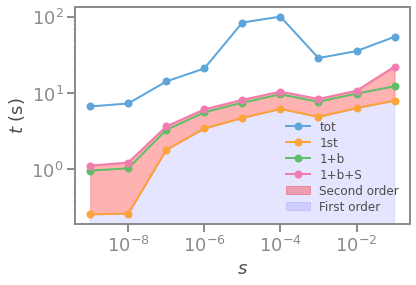

In [404]:
fig, ax = plt.subplots()
x = crunch["parameter"].values
fo_times = amd_times + ame_times + hyb_times
ax.plot(x, tot_times,  label="tot", marker='o')



ax.plot(x, fo_times,  label="1st", marker='o')
ax.plot(x, fo_times + bif_times,  label="1+b", marker='o')
ax.plot(x, fo_times + bif_times + stab_times,  label="1+b+S", marker='o')
# ax.plot(x, ame_times + proj_times,  label="AM-e", marker='o')
# ax.plot(x, hyb_times + proj_times,  label="Hyb", marker='o')


# plt.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='blue', alpha=0.3, label='Stability')

plt.fill_between(x, fo_times, fo_times + bif_times + stab_times, where=(fo_times + bif_times + stab_times >= fo_times ),
                 interpolate=True, color='red', alpha=0.3, label='Second order')

plt.fill_between(x, fo_times,  where=(fo_times >= 0),
                 interpolate=True, color='blue', alpha=0.1, label='First order')


ax.loglog()
plt.legend()
plt.xlabel(r'$s$')

plt.ylabel(r'$t$ (s)')

Text(0, 0.5, '$iterations$')

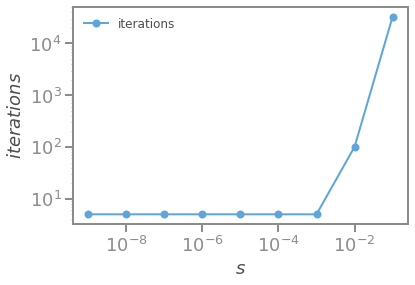

In [405]:
fig, ax = plt.subplots()
ax.plot(crunch["parameter"].values, [its[0] for its in crunch["iterations"]],  label="iterations", marker='o')


ax.loglog()
plt.legend()
plt.xlabel(r'$s$')

plt.ylabel(r'$iterations$')

In [298]:
crunch["tasks"][0]

['~First Order: AltMin solver',
 '~First Order: AltMin-Damage solver',
 '~First Order: AltMin-Elastic solver',
 '~First Order: Hybrid solver',
 '~Second Order: Bifurcation',
 '~Second Order: Cone Project',
 '~Second Order: Stability',
 '~Computation Experiment']

Text(0, 0.5, '$t$ (s)')

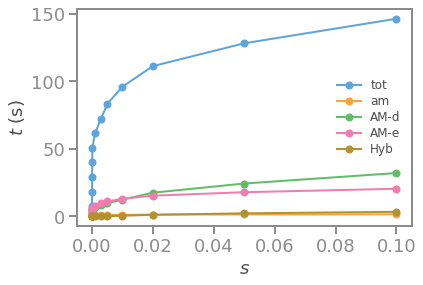

In [299]:
fig, ax = plt.subplots()

ax.plot(crunch["parameter"].values, tot_times,  label="tot", marker='o')
ax.plot(crunch["parameter"].values, am_times,  label="am", marker='o')
ax.plot(crunch["parameter"].values, amd_times + stab_times,  label="AM-d", marker='o')
ax.plot(crunch["parameter"].values, ame_times + proj_times,  label="AM-e", marker='o')
ax.plot(crunch["parameter"].values, hyb_times + proj_times,  label="Hyb", marker='o')

# ax.loglog()
plt.legend()
plt.xlabel(r'$s$')
plt.ylabel(r'$t$ (s)')

In [305]:
data["cone_data"].values

array([{'iterations': [0, 2, 2, 4, 4, 6, 6, 8, 8, 10, 10, 12, 12, 14, 14, 16, 16, 18, 18, 20, 20, 22, 22, 24, 24, 26, 26, 28, 28, 30, 30, 32, 32, 34, 34, 36, 36, 38, 38, 40, 40, 42, 42, 44, 44, 46, 46, 48, 48, 50, 50, 52, 52, 54, 54, 56, 56, 58, 58, 60, 60, 62, 62, 64, 64, 66, 66, 68, 68, 70, 70, 72, 72, 74, 74, 76, 76, 78, 78, 80, 80, 82, 82, 84, 84, 86, 86, 88, 88, 90, 90, 92, 92, 94, 94, 96, 96, 98, 98, 100, 100, 102, 102, 104, 104, 106, 106, 108, 108, 110, 110, 112, 112, 114, 114, 116, 116, 118, 118, 120, 120, 122, 122, 124, 124, 126, 126, 128, 128, 130, 130, 132, 132, 134, 134, 136, 136, 138, 138, 140, 140, 142, 142, 144, 144, 146, 146, 148, 148, 150, 150, 152, 152, 154, 154, 156, 156, 158, 158, 160, 160, 162, 162, 164, 164, 166, 166, 168, 168, 170, 170, 172, 172, 174, 174, 176, 176, 178, 178, 180, 180, 182, 182, 184, 184, 186, 186, 188, 188, 190, 190, 192, 192, 194, 194, 196, 196, 198, 198, 200, 200, 202, 202, 204, 204, 206, 206, 208, 208, 210, 210, 212, 212, 214, 214, 216, 216, 

In [334]:
len(data["cone_data"][0]["iterations"])

20803

[-6.465547839375337e-05, 0.0008555032671379376, 0.0008553975214610094, 0.0008552921475622799, 0.000855187136848888, 0.0008550824810531931, 0.000854978172217737, 0.0008548742026809717, 0.0008547705650636555, 0.0008546672522561102, 0.0008545642574060067, 0.0008544615739068364, 0.0008543591953869544, 0.0008542571156991924, 0.0008541553289109817, 0.0008540538292950067, 0.000853952611320259, 0.0008538516696436184, 0.0008537509991017765, 0.0008536505947036431, 0.000853550451622989, 0.0008534505651916124, 0.0008533509308927123, 0.0008532515443546277, 0.0008531524013448643, 0.000853053497764424, 0.0008529548296423843, 0.0008528563931307268, 0.0008527581844994228, 0.0008526602001317802, 0.0008525624365199034, 0.0008524648902604602, 0.0008523675580506388, 0.0008522704366841896, 0.0008521735230477762, 0.000852076814117399, 0.0008519803069550308, 0.0008518839987053439, 0.0008517878865926598, 0.0008516919679179896, 0.0008515962400561132, 0.0008515007004530377, 0.0008514053466233091, 0.0008513101761

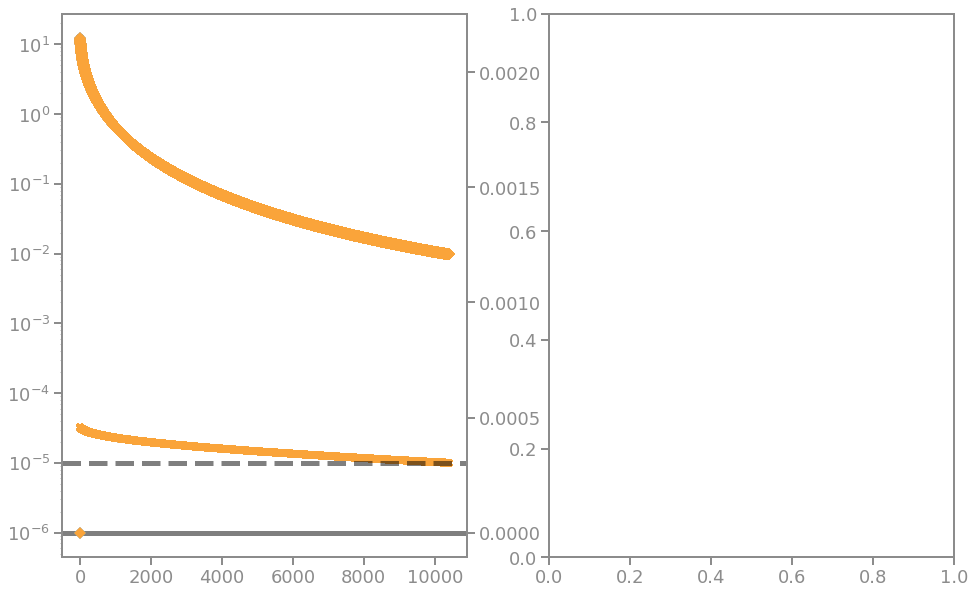

In [322]:
figure, axis = plt.subplots(1, 2, figsize=(16, 10))
# cone_data = data["cone_data"][[isinstance(d["iterations"], int) for d in data["cone_data"]]]
# _offset = sum([not isinstance(d["iterations"], int) for d in data["cone_data"]])

axis2 = axis[0].twinx()
i = 0
for entry in data["cone_data"]:
    # print(entry["error_x_L2"])
    axis[0].plot(entry["error_x_L2"], marker = "X", lw=0)
    axis2.plot(entry["y_norm_L2"],  marker = "D",lw=0)
    
axis[0].axhline(params["stability"]["cone"]["cone_atol"], lw=5, alpha=.5, c='k')
axis[0].axhline(params["stability"]["cone"]["cone_rtol"], lw=5, alpha=.5, c='k', ls='--')

axis[0].set_yscale('log')

for entry in data["cone_data"]:
    print(entry["lambda_k"])
    # axis[1].scatter([i]*len(entry["lambda_k"]), entry["lambda_k"], 
    #                    alpha=np.arange(start=1, stop=len(entry["lambda_k"])+1)/len(entry["lambda_k"]), s=1000*np.array(entry["lambda_k"]))
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


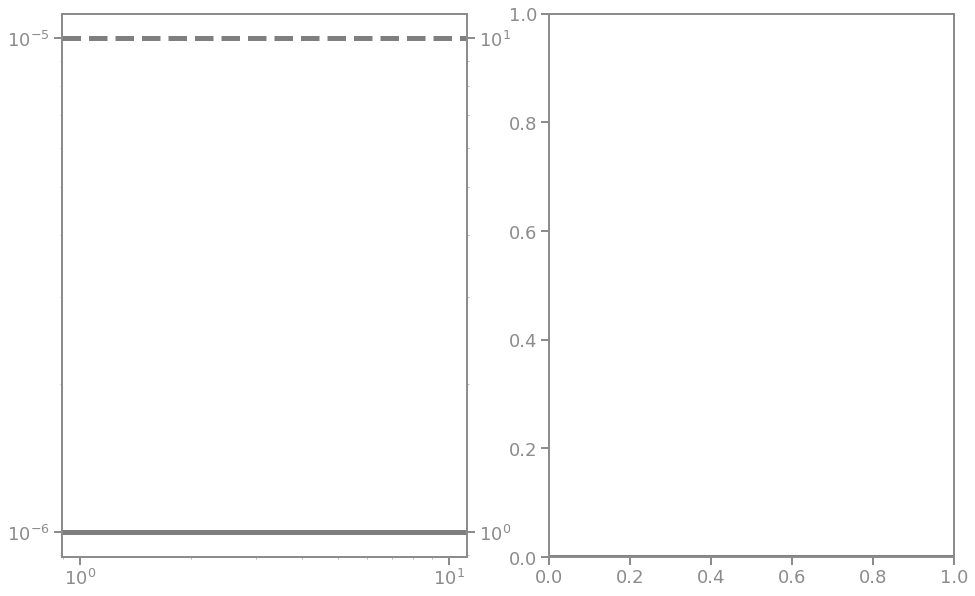

In [306]:

#     print(f"step {_offset + i}: y_norm {entry['y_norm_L2']}")
#     print(f"step {_offset + i}: error_norm {entry['error_x_L2']}")
#     i += 1

# axis[0].axhline(params["stability"]["cone"]["cone_atol"], lw=5, alpha=.5, c='k')
# axis[0].axhline(params["stability"]["cone"]["cone_rtol"], lw=5, alpha=.5, c='k', ls='--')

# axis[0].legend()
# axis2.legend(loc = 'upper left')
# axis[0].set_yscale("log")
# axis[0].set_xscale("log")
# axis2.set_yscale("log")
# # entry
# i = 0
for entry in cone_data:
    entry["iterations"]
    axis[1].scatter([_offset + i]*len(entry["lambda_k"]), entry["lambda_k"], 
                       alpha=np.arange(start=1, stop=len(entry["lambda_k"])+1)/len(entry["lambda_k"]), s=1000*np.array(entry["lambda_k"]))
    
    # print(f"step {_offset + i}: {entry['y_norm_L2']}")
    i += 1

axis[1].axhline(params["stability"]["cone"]["cone_atol"], lw=5, alpha=.5, c='k')


### vs s

In [575]:

# dry

dirroot = '../../practice/output/parametric/traction-bar/vs_s/39b1952d1410a23626fe525f65536210'

In [576]:
crunch = get_timing_parametric_vs_s(dirroot)
    

In [577]:
am_times = np.array([crunch["computations"][i][0] for i in range(len(crunch["computations"]))])
amd_times = np.array([crunch["computations"][i][1] for i in range(len(crunch["computations"]))])
ame_times = np.array([crunch["computations"][i][2] for i in range(len(crunch["computations"]))])
hyb_times = np.array([crunch["computations"][i][3] for i in range(len(crunch["computations"]))])


offset = 4

bif_times = np.array([crunch["computations"][i][offset + 0] for i in range(len(crunch["computations"]))])
proj_times = np.array([crunch["computations"][i][offset + 1] for i in range(len(crunch["computations"]))])
stab_times = np.array([crunch["computations"][i][offset + 2] for i in range(len(crunch["computations"]))])
tot_times = np.array([crunch["computations"][i][-1] for i in range(len(crunch["computations"]))])


Text(0, 0.5, '$t$ (s)')

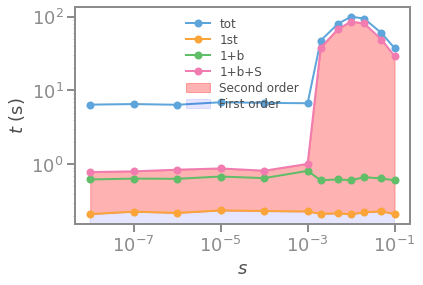

In [578]:
fig, ax = plt.subplots()
x = crunch["parameter"].values
fo_times = amd_times + ame_times + hyb_times
ax.plot(x, tot_times,  label="tot", marker='o')



ax.plot(x, fo_times,  label="1st", marker='o')
ax.plot(x, fo_times + bif_times,  label="1+b", marker='o')
ax.plot(x, fo_times + bif_times + stab_times,  label="1+b+S", marker='o')
# ax.plot(x, ame_times + proj_times,  label="AM-e", marker='o')
# ax.plot(x, hyb_times + proj_times,  label="Hyb", marker='o')


# plt.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='blue', alpha=0.3, label='Stability')

plt.fill_between(x, fo_times, fo_times + bif_times + stab_times, where=(fo_times + bif_times + stab_times >= fo_times ),
                 interpolate=True, color='red', alpha=0.3, label='Second order')

plt.fill_between(x, fo_times,  where=(fo_times >= 0),
                 interpolate=True, color='blue', alpha=0.1, label='First order')


ax.loglog()
plt.legend()
plt.xlabel(r'$s$')

plt.ylabel(r'$t$ (s)')

Text(0.5, 0, '$s$')

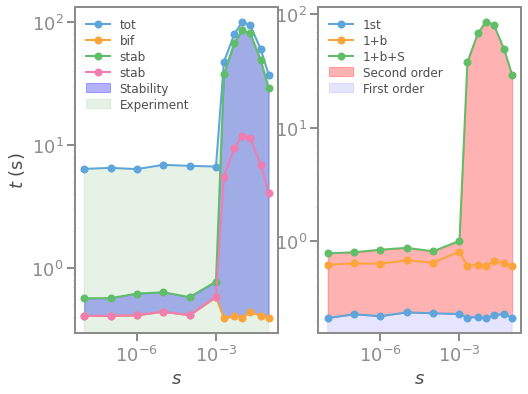

In [579]:

am_times = np.array([crunch["computations"][i][0] for i in range(len(crunch["computations"]))])
amd_times = np.array([crunch["computations"][i][1] for i in range(len(crunch["computations"]))])
ame_times = np.array([crunch["computations"][i][2] for i in range(len(crunch["computations"]))])
hyb_times = np.array([crunch["computations"][i][3] for i in range(len(crunch["computations"]))])


offset = 4

bif_times = np.array([crunch["computations"][i][offset + 0] for i in range(len(crunch["computations"]))])
proj_times = np.array([crunch["computations"][i][offset + 1] for i in range(len(crunch["computations"]))])
stab_times = np.array([crunch["computations"][i][offset + 2] for i in range(len(crunch["computations"]))])
tot_times = np.array([crunch["computations"][i][-1] for i in range(len(crunch["computations"]))])

fig, axes = plt.subplots(1, 2, figsize=(8, 6))
x = crunch["parameter"].values

ax = axes[0]
ax.plot(x, tot_times,  label="tot", marker='o')
ax.plot(x, bif_times,  label="bif", marker='o')
ax.plot(x, bif_times + stab_times,  label="stab", marker='o')
ax.plot(x, bif_times + proj_times,  label="stab", marker='o')

ax.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
                 interpolate=True, color='blue', alpha=0.3, label='Stability')

# ax.fill_between(x, bif_times, bif_times + proj_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='red', alpha=0.3, label='Projection')

ax.fill_between(x, tot_times,  where=(tot_times >= 0),
                 interpolate=True, color='green', alpha=0.1, label='Experiment')


ax.loglog()
ax.legend()
ax.set_xlabel(r'$s$')

ax.set_ylabel(r'$t$ (s)')


ax = axes[1]


ax.plot(x, fo_times,  label="1st", marker='o')
ax.plot(x, fo_times + bif_times,  label="1+b", marker='o')
ax.plot(x, fo_times + bif_times + stab_times,  label="1+b+S", marker='o')
# ax.plot(x, ame_times + proj_times,  label="AM-e", marker='o')
# ax.plot(x, hyb_times + proj_times,  label="Hyb", marker='o')


# plt.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='blue', alpha=0.3, label='Stability')

ax.fill_between(x, fo_times, fo_times + bif_times + stab_times, where=(fo_times + bif_times + stab_times >= fo_times ),
                 interpolate=True, color='red', alpha=0.3, label='Second order')

ax.fill_between(x, fo_times,  where=(fo_times >= 0),
                 interpolate=True, color='blue', alpha=0.1, label='First order')

ax.loglog()
ax.legend()
ax.set_xlabel(r'$s$')


## vs s

In [697]:
dirroot = '../../practice/output/parametric/traction-bar/vs_s/at1/5e75bdf88ee2b94491b44f64345ad5e2'
# params, data, signature = pp.load_data(experiment)

crunch = get_timing_parametric(dirroot)


0.1
3.727593720314938e-05
0.0005179474679231213
1e-05
0.0019306977288832496
0.00013894954943731373
0.007196856730011514
0.026826957952797246


In [695]:
crunch = {
    "timings" : [],
    "tasks" : [],
    "parameter" : [],
    "n_proc" : [],
    "n_dofs" : [],
    "iterations" : [],
}

for subdir, dirs, files in os.walk(dirroot):
    if not os.path.isfile(subdir + "/signature.md5"):
        continue

    with open(subdir + '/timing_data.json', 'r') as f:
        _timings = json.load(f)

    with open(subdir + '/performance.json', 'r') as f:
        performance = json.load(f)

    params, data, signature = pp.load_data(subdir)
    timings = pd.DataFrame(json.loads(_timings), 
                            columns=["reps", "wall tot", "usr", "sys"], 
                            index=tasks)
    print(params["stability"]['cone']["scaling"])
    crunch["timings"].append(timings['wall tot'].values)
    crunch["parameter"].append(params["stability"]['cone']["scaling"])
    # crunch["parameter"].append(0)
    crunch["tasks"].append(tasks)
    crunch["n_proc"].append(int(performance['N'][0]))
    crunch["n_dofs"].append(int(performance['dofs'][0]))
    crunch["iterations"].append(data["cone_data"].tolist()[0]["iterations"])

crunch = pd.DataFrame(crunch)
crunch.sort_values('parameter', inplace = True)
crunch.reset_index(inplace=True, drop=True)

crunch

0.1
3.727593720314938e-05
0.0005179474679231213
1e-05
0.0019306977288832496
0.00013894954943731373
0.007196856730011514
0.026826957952797246


,computations,tasks,parameter,n_proc,n_dofs,iterations
0,"[0.221500792, 0.020792875, 0.131156417, 0.0156...","[~First Order: AltMin solver, ~First Order: Al...",0.000010,1,465,4
1,"[0.304971001, 0.020671208, 0.131685209, 0.0209...","[~First Order: AltMin solver, ~First Order: Al...",0.000037,1,465,4
2,"[0.230963834, 0.02106275, 0.1343575, 0.0160260...","[~First Order: AltMin solver, ~First Order: Al...",0.000139,1,465,4
3,"[0.267073458, 0.024503042, 0.134010834, 0.0167...","[~First Order: AltMin solver, ~First Order: Al...",0.000518,1,465,66928
4,"[0.230716, 0.020842333, 0.135250959, 0.0169201...","[~First Order: AltMin solver, ~First Order: Al...",0.001931,1,465,211070
5,"[0.233564, 0.021290249, 0.136386792, 0.0180994...","[~First Order: AltMin solver, ~First Order: Al...",0.007197,1,465,521198
6,"[0.228550625, 0.022673125, 0.130647958, 0.0166...","[~First Order: AltMin solver, ~First Order: Al...",0.026827,1,465,246654
7,"[0.2294815, 0.021502167, 0.137202334, 0.015689...","[~First Order: AltMin solver, ~First Order: Al...",0.100000,1,465,91140


In [707]:
crunch["timings"][0]

array([2.21500792e-01, 2.07928750e-02, 1.31156417e-01, 1.56495000e-02,
       3.61779625e-01, 1.05545800e-03, 1.63722875e-01, 6.20108138e+00,
       4.51980892e+00])

Text(0.5, 0, '$s$')

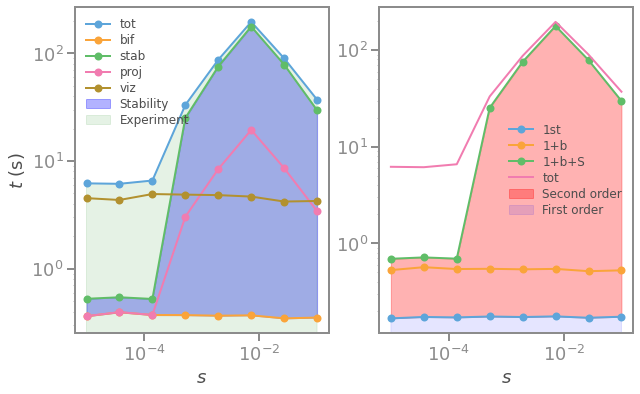

In [712]:

am_times = np.array([crunch["timings"][i][0] for i in range(len(crunch["timings"]))])
amd_times = np.array([crunch["timings"][i][1] for i in range(len(crunch["timings"]))])
ame_times = np.array([crunch["timings"][i][2] for i in range(len(crunch["timings"]))])
hyb_times = np.array([crunch["timings"][i][3] for i in range(len(crunch["timings"]))])

fo_times = amd_times + ame_times + hyb_times

offset = 4

bif_times = np.array([crunch["timings"][i][offset + 0] for i in range(len(crunch["timings"]))])
proj_times = np.array([crunch["timings"][i][offset + 1] for i in range(len(crunch["timings"]))])
stab_times = np.array([crunch["timings"][i][offset + 2] for i in range(len(crunch["timings"]))])
tot_times = np.array([crunch["timings"][i][-2] for i in range(len(crunch["timings"]))])
viz_times = np.array([crunch["timings"][i][-1] for i in range(len(crunch["timings"]))])

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
x = crunch["parameter"].values

ax = axes[0]
ax.plot(x, tot_times,  label="tot", marker='o')
ax.plot(x, bif_times,  label="bif", marker='o')
ax.plot(x, bif_times + stab_times,  label="stab", marker='o')
ax.plot(x, bif_times + proj_times,  label="proj", marker='o')
ax.plot(x, viz_times,  label="viz", marker='o')

ax.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
                 interpolate=True, color='blue', alpha=0.3, label='Stability')

# ax.fill_between(x, bif_times, bif_times + proj_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='red', alpha=0.3, label='Projection')

ax.fill_between(x, tot_times,  where=(tot_times >= 0),
                 interpolate=True, color='green', alpha=0.1, label='Experiment')


ax.loglog()
ax.legend()
ax.set_xlabel(r'$s$')

ax.set_ylabel(r'$t$ (s)')
# ax.twinx().plot(crunch["parameter"].values, [a[0] for a in crunch["iterations"].values],  label="iterations", marker='', c='k')
# ax.axvline(1, lw=3, ls='--', c='k')

ax = axes[1]


ax.plot(x, fo_times,  label="1st", marker='o')
ax.plot(x, fo_times + bif_times,  label="1+b", marker='o')
ax.plot(x, fo_times + bif_times + stab_times,  label="1+b+S", marker='o')
# ax.plot(x, ame_times + proj_times,  label="AM-e", marker='o')
# ax.plot(x, hyb_times + proj_times,  label="Hyb", marker='o')
ax.plot(x, tot_times,  label="tot", marker='')


# plt.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='blue', alpha=0.3, label='Stability')

ax.fill_between(x, fo_times, fo_times + bif_times + stab_times, where=(fo_times + bif_times + stab_times >= fo_times ),
                 interpolate=True, color='red', alpha=0.3, label='Second order')

ax.fill_between(x, fo_times,  where=(fo_times >= 0),
                 interpolate=True, color='blue', alpha=0.1, label='First order')

ax.loglog()
ax.legend()
ax.set_xlabel(r'$s$')


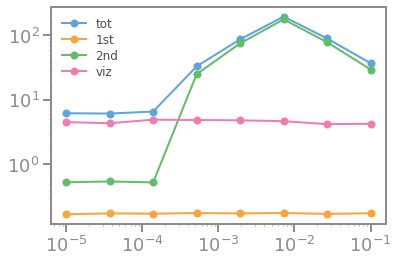

In [716]:
so_times = bif_times + stab_times


fig, ax = plt.subplots()
ax.plot(x, tot_times,  label="tot", marker='o')
ax.plot(x, fo_times,  label="1st", marker='o')
ax.plot(x, so_times,  label="2nd", marker='o')
ax.plot(x, viz_times,  label="viz", marker='o')


ax.loglog()
plt.legend()


In [617]:

dirroot = '../../practice/output/parametric/traction-bar/vs_s/71a76e17ecd64eccac904cd7d21a3b46'

crunch = get_timing_parametric_vs_s(dirroot)
crunch["parameter"].values

array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 2.e-04, 5.e-04, 1.e-03,
       2.e-03, 3.e-03, 5.e-03, 1.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01,
       5.e-01, 6.e-01])

Text(0.5, 0, '$s$')

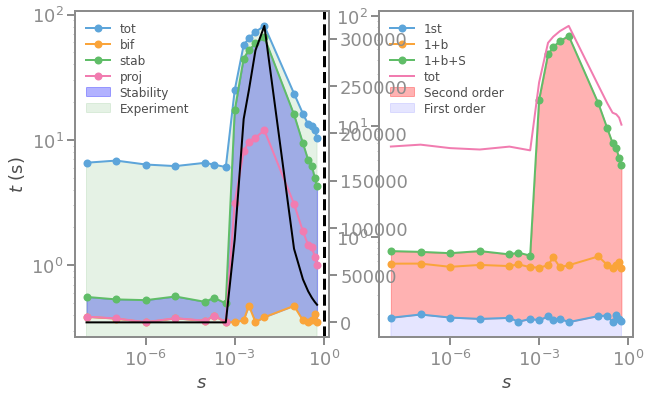

In [620]:

am_times = np.array([crunch["computations"][i][0] for i in range(len(crunch["computations"]))])
amd_times = np.array([crunch["computations"][i][1] for i in range(len(crunch["computations"]))])
ame_times = np.array([crunch["computations"][i][2] for i in range(len(crunch["computations"]))])
hyb_times = np.array([crunch["computations"][i][3] for i in range(len(crunch["computations"]))])

fo_times = amd_times + ame_times + hyb_times

offset = 4

bif_times = np.array([crunch["computations"][i][offset + 0] for i in range(len(crunch["computations"]))])
proj_times = np.array([crunch["computations"][i][offset + 1] for i in range(len(crunch["computations"]))])
stab_times = np.array([crunch["computations"][i][offset + 2] for i in range(len(crunch["computations"]))])
tot_times = np.array([crunch["computations"][i][-1] for i in range(len(crunch["computations"]))])

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
x = crunch["parameter"].values

ax = axes[0]
ax.plot(x, tot_times,  label="tot", marker='o')
ax.plot(x, bif_times,  label="bif", marker='o')
ax.plot(x, bif_times + stab_times,  label="stab", marker='o')
ax.plot(x, bif_times + proj_times,  label="proj", marker='o')

ax.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
                 interpolate=True, color='blue', alpha=0.3, label='Stability')

# ax.fill_between(x, bif_times, bif_times + proj_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='red', alpha=0.3, label='Projection')

ax.fill_between(x, tot_times,  where=(tot_times >= 0),
                 interpolate=True, color='green', alpha=0.1, label='Experiment')


ax.loglog()
ax.legend()
ax.set_xlabel(r'$s$')

ax.set_ylabel(r'$t$ (s)')
ax.twinx().plot(crunch["parameter"].values, [a[0] for a in crunch["iterations"].values],  label="iterations", marker='', c='k')
ax.axvline(1, lw=3, ls='--', c='k')

ax = axes[1]


ax.plot(x, fo_times,  label="1st", marker='o')
ax.plot(x, fo_times + bif_times,  label="1+b", marker='o')
ax.plot(x, fo_times + bif_times + stab_times,  label="1+b+S", marker='o')
# ax.plot(x, ame_times + proj_times,  label="AM-e", marker='o')
# ax.plot(x, hyb_times + proj_times,  label="Hyb", marker='o')
ax.plot(x, tot_times,  label="tot", marker='')


# plt.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='blue', alpha=0.3, label='Stability')

ax.fill_between(x, fo_times, fo_times + bif_times + stab_times, where=(fo_times + bif_times + stab_times >= fo_times ),
                 interpolate=True, color='red', alpha=0.3, label='Second order')

ax.fill_between(x, fo_times,  where=(fo_times >= 0),
                 interpolate=True, color='blue', alpha=0.1, label='First order')

ax.loglog()
ax.legend()
ax.set_xlabel(r'$s$')


In [604]:
[a[0] for a in crunch["iterations"].values]

[5, 5, 5, 5, 5, 5, 5, 87903, 214997, 245541, 287605, 313563, 77889, 45501]

Text(0, 0.5, '$iterations$')

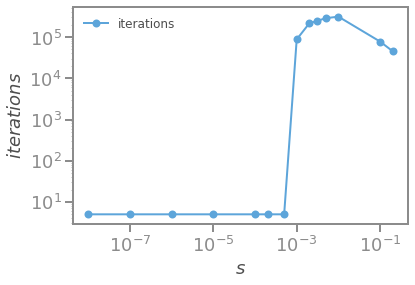

In [606]:
fig, ax = plt.subplots()
ax.plot(crunch["parameter"].values, [a[0] for a in crunch["iterations"].values],  label="iterations", marker='o')


ax.loglog()
plt.legend()
plt.xlabel(r'$s$')

plt.ylabel(r'$iterations$')

## vs resolution

In [621]:

dirroot = '../../practice/output/parametric/traction-bar/vs_resolution/71a76e17ecd64eccac904cd7d21a3b46'


In [622]:
crunch = get_timing_parametric(dirroot)
crunch.sort_values('n_dofs', inplace = True)
crunch.reset_index(inplace=True, drop=True)
crunch

,computations,tasks,parameter,n_proc,n_dofs,iterations
0,"[0.169003292, 0.016050791, 0.08782325, 0.01383...","[~First Order: AltMin solver, ~First Order: Al...",0,1,198,[5]
1,"[0.220488792, 0.021052124, 0.131230709, 0.0161...","[~First Order: AltMin solver, ~First Order: Al...",0,1,465,[5]
2,"[0.279634875, 0.026030708, 0.173382126, 0.0182...","[~First Order: AltMin solver, ~First Order: Al...",0,1,747,[5]
3,"[0.344254917, 0.034449499, 0.217923458, 0.0173...","[~First Order: AltMin solver, ~First Order: Al...",0,1,1080,[5]
4,"[0.419772375, 0.037314584, 0.286407542, 0.0229...","[~First Order: AltMin solver, ~First Order: Al...",0,1,1473,[5]
5,"[0.564042917, 0.046109708, 0.41790825, 0.02491...","[~First Order: AltMin solver, ~First Order: Al...",0,1,2022,[5]
6,"[0.713928001, 0.057466917, 0.539569084, 0.0282...","[~First Order: AltMin solver, ~First Order: Al...",0,1,2670,[5]
7,"[0.781971625, 0.061558, 0.607296208, 0.0296271...","[~First Order: AltMin solver, ~First Order: Al...",0,1,3066,[5]


In [623]:
am_times = np.array([crunch["computations"][i][0] for i in range(len(crunch["computations"]))])
amd_times = np.array([crunch["computations"][i][1] for i in range(len(crunch["computations"]))])
ame_times = np.array([crunch["computations"][i][2] for i in range(len(crunch["computations"]))])
hyb_times = np.array([crunch["computations"][i][3] for i in range(len(crunch["computations"]))])

offset = 4

bif_times = np.array([crunch["computations"][i][offset + 0] for i in range(len(crunch["computations"]))])
proj_times = np.array([crunch["computations"][i][offset + 1] for i in range(len(crunch["computations"]))])
stab_times = np.array([crunch["computations"][i][offset + 2] for i in range(len(crunch["computations"]))])
tot_times = np.array([crunch["computations"][i][-1] for i in range(len(crunch["computations"]))])


Text(0, 0.5, '$t$ (s)')

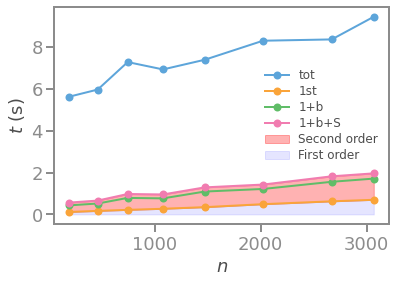

In [624]:
fig, ax = plt.subplots()
x = crunch["n_dofs"].values
fo_times = amd_times + ame_times + hyb_times
ax.plot(x, tot_times,  label="tot", marker='o')



ax.plot(x, fo_times,  label="1st", marker='o')
ax.plot(x, fo_times + bif_times,  label="1+b", marker='o')
ax.plot(x, fo_times + bif_times + stab_times,  label="1+b+S", marker='o')
# ax.plot(x, ame_times + proj_times,  label="AM-e", marker='o')
# ax.plot(x, hyb_times + proj_times,  label="Hyb", marker='o')


# plt.fill_between(x, bif_times, bif_times + stab_times, where=(bif_times + stab_times >= bif_times),
#                  interpolate=True, color='blue', alpha=0.3, label='Stability')

plt.fill_between(x, fo_times, fo_times + bif_times + stab_times, where=(fo_times + bif_times + stab_times >= fo_times ),
                 interpolate=True, color='red', alpha=0.3, label='Second order')

plt.fill_between(x, fo_times,  where=(fo_times >= 0),
                 interpolate=True, color='blue', alpha=0.1, label='First order')


# ax.loglog()
plt.legend()
plt.xlabel(r'$n$')

plt.ylabel(r'$t$ (s)')